## Name - Devansh Shah
## Roll Number - 20BCE055
## Practical-4

## 1) MULTIPLE REGRESSION WITH NORMALIZATION WITHOUT SKLEARN

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_boston 
boston = load_boston() #importing dataset

In [4]:
print(boston.data.shape)
print(boston.feature_names.shape)

(506, 13)
(13,)


In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
X=np.ones((df.shape[0],df.shape[1]+1))
X[:,1:]=df
print("Shape of Array is: ",X.shape)

Shape of Array is:  (506, 14)


In [7]:
#Fitting and Transforming Data
scaler = StandardScaler()
scaler.fit(X[:,1:])
X[:,1:] = scaler.transform(X[:,1:])

In [8]:
Xtrain=X[:400,:]
Y=boston.target
Ytrain=Y[:400]
Yactual=Y[400:]
Xtest=X[400:,:]
print(Xtrain.shape)
print(Xtest.shape)
print(Y.shape)

(400, 14)
(106, 14)
(506,)


In [80]:
alpha=0.001
iterations=10 #have kept runtime 10 as am encountering stack overflow error if iterations>50
reg_constant=10

In [81]:
theta=np.random.uniform(0,10,size=Xtrain.shape[1])
print(theta)
update=np.zeros(Xtrain.shape[1])
print(update)

[0.15454211 3.55332085 1.99478459 0.15713767 5.71251903 2.63234595
 6.76286132 4.38144542 3.83544147 8.69297244 4.44635985 0.755398
 4.66131992 7.49518535]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [82]:
for i in range(iterations):
    ypred=np.dot(Xtrain,theta)
    diff=ypred-Ytrain
    #plot iterations and error
    for j in range(Xtrain.shape[1]):
        update[j]=np.sum((diff*Xtrain.T)[j])
        #theta = theta - (1/Xtrain.shape[0])*alpha*update
        theta[0]=theta[0]-update[0]
        theta[1:] = theta[1:]*(1-alpha/Xtrain.shape[0])-update[1:]
print("Final value of Theta is: ",theta)

Final value of Theta is:  [-5.08220777e+42  4.72551119e+42 -9.15668318e+42  8.79885291e+42
  1.56661928e+42  7.36125901e+42 -3.57627471e+42  5.46752031e+42
 -4.97106387e+42  2.46998731e+42  2.21680009e+42  1.04078869e+42
 -3.98930225e+41  6.10966093e+41]


In [83]:
Ytestpred=np.dot(Xtest,theta)
MSE = sklearn.metrics.mean_squared_error(Yactual,Ytestpred)
MAE = sklearn.metrics.mean_absolute_error(Yactual,Ytestpred)
print("The Mean Squared Error is: ",MSE)
print("The Mean Absolute Error is: ",MAE)

The Mean Squared Error is:  1.3453834330008874e+87
The Mean Absolute Error is:  3.2887338285276363e+43


## 3) SIMPLE LINEAR REGRESSION WITH AND WITHOUT NORMALIZATION WITH SKLEARN

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
df3=pd.read_csv('Train.csv')

In [17]:
print(df3.head())
print(df3.shape)

    x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984
(699, 2)


In [34]:
X = np.array(df3['x']).reshape(-1, 1)
y = np.array(df3['y']).reshape(-1, 1)

[]

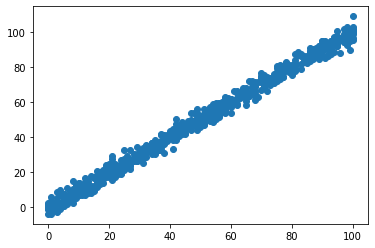

In [35]:
plt.scatter(X,y)
plt.plot()

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3)

## Without Regularization

In [54]:
reg1=LinearRegression()
reg1.fit(X,y)

LinearRegression()

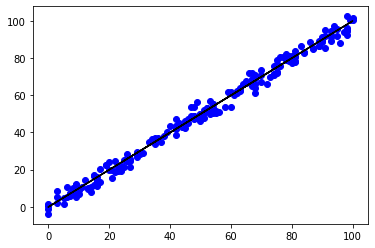

In [55]:
ypred = reg1.predict(Xtest)
plt.scatter(Xtest, ytest, color ='b')
plt.plot(Xtest, ypred, color ='k')
plt.show()

In [56]:
MSE = sklearn.metrics.mean_squared_error(ytest,ypred)
MAE = sklearn.metrics.mean_absolute_error(ytest,ypred)
print("The Mean Squared Error is: ",MSE)
print("The Mean Absolute Error is: ",MAE)

The Mean Squared Error is:  7.717397375123314
The Mean Absolute Error is:  2.2397916673478937


## With Regularization

https://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/

In [ ]:
reg2=LinearRegression()

In [3]:
import requests
import os



for i in range(30):
    # URL of the file to be downloaded
    # url = "https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_30mb.mp4"
    url2 = "https://speed.hetzner.de/1GB.bin"

    # Download the file
    response = requests.get(url2)
    open("file.zip", "wb").write(response.content)

    # Delete the file
    os.remove("file.zip")


KeyboardInterrupt: 

In [2]:
import urllib.request
import socket
import threading
def download_file(connection_type, url, file_name):
    # Set the socket timeout to 5 seconds
    socket.setdefaulttimeout(5)
    # Set the connection type for the URL opener
    if connection_type == 'ethernet':
        opener = urllib.request.FancyURLopener({'http':'eth0'})
    elif connection_type == 'Wi-Fi':
        opener = urllib.request.FancyURLopener({'http':'wlan0'})
    else:
        return 'Invalid connection type'
    # Download the file from the URL
    try:
        opener.retrieve(url, file_name)
    except Exception as e:
        return 'Error: ' + str(e)
    
# url = 'https://www.example.com/file.zip'
file_name = 'file.zip'
# Start a thread to download the file from the ethernet connection
thread_ethernet = threading.Thread(target=download_file, args=('ethernet', url2,file_name))
thread_ethernet.start()
# Start a thread to download the file from the Wi-Fi connection
thread_WiFi = threading.Thread(target=download_file, args=('Wi-Fi', url2,file_name))
thread_WiFi.start()
# Wait for both threads to finish
thread_ethernet.join()
thread_WiFi.join()
os.remove("file.zip")



C:\Users\Owner\AppData\Local\Temp\ipykernel_21048\1374321524.py:9: DeprecationWarning: FancyURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  opener = urllib.request.FancyURLopener({'http':'eth0'})
C:\Users\Owner\AppData\Local\Temp\ipykernel_21048\1374321524.py:11: DeprecationWarning: FancyURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  opener = urllib.request.FancyURLopener({'http':'wlan0'})
